# Apricot package demonstration

The following notebook demonstrates a hypotetical problem to illustrate the application of the Apricot package.

A short fictional backstory for the problem in order to motivate a the interest and simulate the real world scenarios.

## Problem:

You are the of the Chief Network specialist for a new  aviation company called Flixflight, the company is a new participant in the German Aviation market. The company plans on entering the local flights market. As a new participant in this competitive market, the company would need to come up with a decisive plan to start their operations. The C-Board members have an important meeting to deceide a penetration strategy. The task is forwarded to the Chief Network specialist hence it is your task to analyse the current specfic routes and come up with a stratergy.

You decide that the best stratergy would be to start the services with in airports that cover most of routes. This is a Max Cover Problem. Operating in each of the airport entail operational costs hence as a budding company you are restricted to choosing 4 airports. This restriction in the number of airports is a cardinality constraint for the above problem.


The above defined problem is a Submodular Monotone Maximization problem.


In [ ]:
#Necessary Packages
!pip install geopandas
!pip install apricot-select

In [ ]:
import pandas as pd
import seaborn; seaborn.set_style('whitegrid')
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline


## Data

A brief description about the dataset that would be used in this demonstration.
The data is from the openflights.org, a free open-source tool that contains over 10,000 airports, train stations and ferry terminals.

During the analysis we use 2 csv files which are airports.csv and routes.csv. The airports.csv file contains information about individual airports such Aiport ID, Name Country, gps location and so on. The routes.csv contains the possible routes between each of the airports.

Our dataset is filtered with Germany as it is the only place of interest.

In [ ]:
names = 'Airport ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz', 'Type', 'Source'
airports = pd.read_csv("/content/airports.csv", header=None, names=names)
airports = airports[airports['Country'] == 'Germany']
airports.head()

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz,Type,Source
314,317,Flugplatz Bautzen,Bautzen,Germany,\N,EDAB,51.193611,14.519722,568,1,E,Europe/Berlin,airport,OurAirports
315,318,Altenburg-Nobitz Airport,Altenburg,Germany,AOC,EDAC,50.981945,12.506389,640,1,E,Europe/Berlin,airport,OurAirports
316,319,Dessau Airfield,Dessau,Germany,\N,EDAD,51.831694,12.190962,187,1,E,Europe/Berlin,airport,OurAirports
317,320,Eisenhüttenstadt Airfield,Eisenhuettenstadt,Germany,\N,EDAE,52.195856,14.587530,144,1,E,Europe/Berlin,airport,OurAirports
318,322,Großenhain Airport,Suhl,Germany,\N,EDAK,51.308056,13.555556,417,1,E,Europe/Berlin,airport,OurAirports


There is a total of 249 airports in the given dataset. It is important to understand that most of the airport would be filtered out as the routes dataset is not exhaustive.

In [ ]:
names = 'Airline', 'Airline ID', 'Source ', 'Source ID', 'Destination', 'Destination ID', 'Codeshare', 'Stops', 'Equipment'
routes = pd.read_csv("/content/routes.csv", header=None, names=names)
routes = routes.replace("\\N", np.nan).dropna()
routes['Source ID'] = routes['Source ID'].astype(int)
routes['Destination ID'] = routes['Destination ID'].astype(int)
routes = routes.dropna()
routes.head()

,Airline,Airline ID,Source,Source ID,Destination,Destination ID,Codeshare,Stops,Equipment
187,2P,897,GES,2402,MNL,2397,Y,0,320
197,2P,897,MNL,2397,GES,2402,Y,0,320
1059,4M,3201,DFW,3670,EZE,3988,Y,0,777
1060,4M,3201,EZE,3988,DFW,3670,Y,0,777
1061,4M,3201,EZE,3988,JFK,3797,Y,0,777


Now the routes dataframe is begin created. This dataframe would later be joined with the airport dataframe to provide an overview of the entire dataset. These routes include a source airport, which is where the flight began, and a destination airport.

# German Airport Visualization

In [ ]:
top_cities = {
    'Berlin': (13.404954, 52.520008), 
    'Cologne': (6.953101, 50.935173),
    'Düsseldorf': (6.782048, 51.227144),
    'Frankfurt am Main': (8.682127, 50.110924),
    'Hamburg': (9.993682, 53.551086),
    'Leipzig': (12.387772, 51.343479),
    'Munich': (11.576124, 48.137154),
    'Dortmund': (7.468554, 51.513400),
    'Stuttgart': (9.181332, 48.777128),
    'Nuremberg': (11.077438, 49.449820),
    'Hannover': (9.73322, 52.37052)
}

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
germany = world.query('name == "Germany"')

<Figure size 1080x792 with 0 Axes>

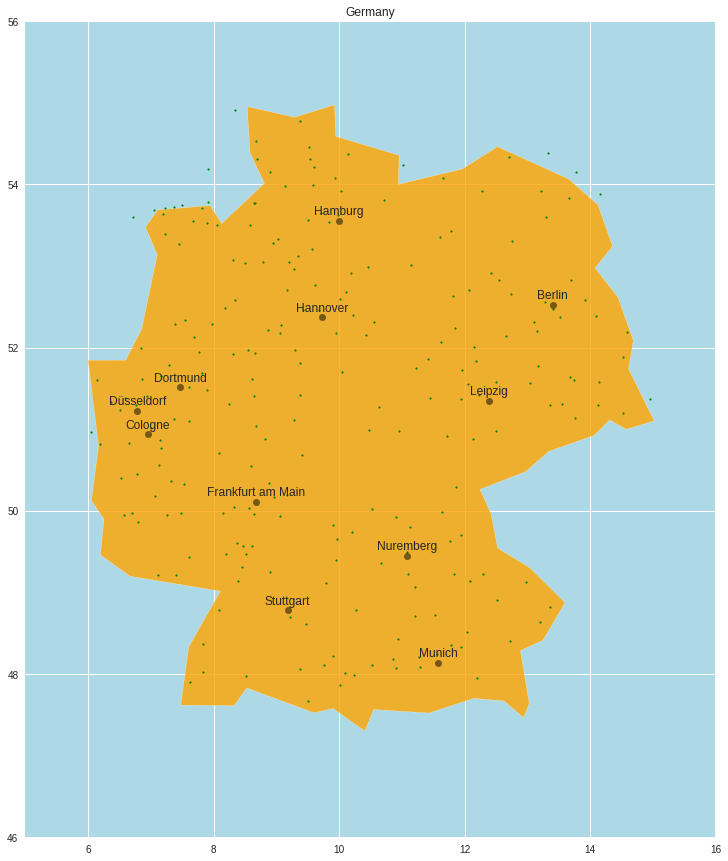

In [ ]:
plt.figure(figsize=(15, 11))
fig, ax = plt.subplots()
germany.plot(ax=ax,color='orange',alpha=0.8)
plt.scatter(airports['Longitude'], airports['Latitude'], s=3, color='g')
plt.ylim(46, 56)
plt.xlim(5, 16)
for c in top_cities.keys():
    # Plot city name.
    ax.text(
        x=top_cities[c][0], 
        # Add small shift to avoid overlap with point.
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )
    # Plot city location centroid.
    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany', 
    aspect=1.3, 
    facecolor='lightblue'
)
fig.set_figheight(15)
fig.set_figwidth(15)

The above polgon resembles the geographical edges of Germany.

The next step would be to join the 2 tables airport.csv and routes.csv to get a final dataset that can be used to do the analysis.


In [ ]:
routes_reduced = routes[['Source ID', 'Destination ID']].drop_duplicates()
airports_reduced = airports[['Airport ID', 'Latitude', 'Longitude']]

routes_merged = pd.merge(routes_reduced, airports_reduced, left_on='Source ID', right_on='Airport ID')
routes_merged = pd.merge(routes_merged, airports_reduced, left_on='Destination ID', right_on='Airport ID', suffixes=('_source', '_destination'))
routes_merged = routes_merged.drop(['Airport ID_destination', 'Airport ID_source'], axis=1)
routes_merged

,Source ID,Destination ID,Latitude_source,Longitude_source,Latitude_destination,Longitude_destination
0,345,340,51.289501,6.766780,50.033333,8.570556
1,346,340,48.353802,11.786100,50.033333,8.570556
2,351,340,52.559700,13.287700,50.033333,8.570556
3,382,340,47.671299,9.511490,50.033333,8.570556
4,341,340,52.134602,7.684830,50.033333,8.570556
5,410,340,54.913200,8.340470,50.033333,8.570556
6,340,345,50.033333,8.570556,51.289501,6.766780
7,340,346,50.033333,8.570556,48.353802,11.786100
8,350,346,48.689899,9.221960,48.353802,11.786100
9,347,346,49.498699,11.078056,48.353802,11.786100


# Unique Flights routes within Germany

The visualization shows all the unique flight routes within Germany. The objective of finding the unique routes is to avoid multiple counts while calculating the final objective value.

<Figure size 1080x792 with 0 Axes>

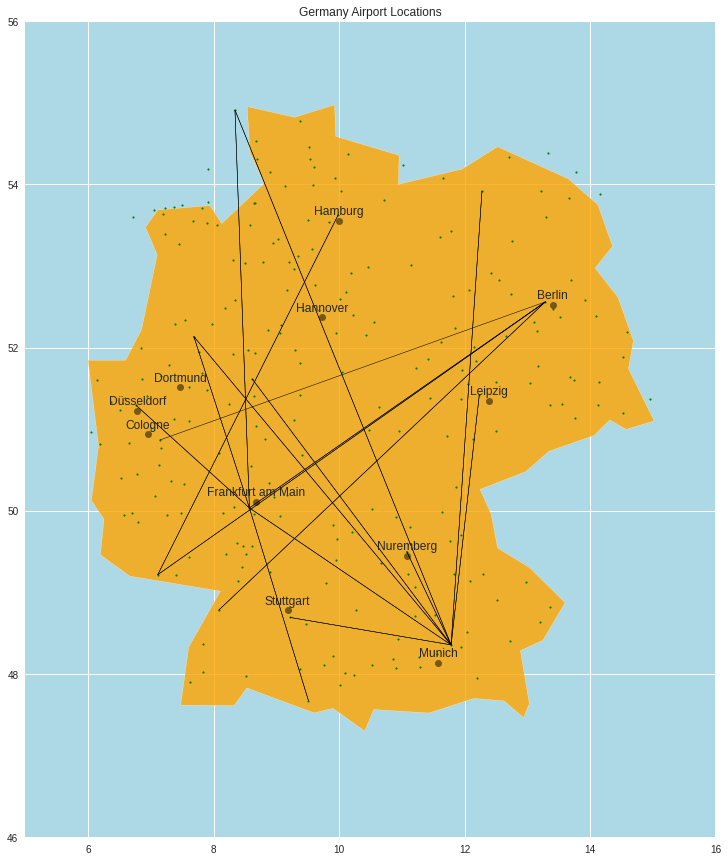

In [ ]:

plt.figure(figsize=(15, 11))
fig, ax = plt.subplots()
germany.plot(ax=ax,color='orange',alpha=0.8)
for i, (_, _, la_x, lo_x, la_y, lo_y) in routes_merged.iterrows():
    plt.plot([lo_x, lo_y], [la_x, la_y], color='k', linewidth=0.5)
plt.scatter(airports['Longitude'], airports['Latitude'], s=3, color='g')
plt.ylim(46, 56)
plt.xlim(5, 16)
for c in top_cities.keys():
    # Plot city name.
    ax.text(
        x=top_cities[c][0], 
        # Add small shift to avoid overlap with point.
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )
    # Plot city location centroid.
    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany Airport Locations', 
    aspect=1.3, 
    facecolor='lightblue'
)
fig.set_figheight(15)
fig.set_figwidth(15)

# The total number of unique routes are 34

In [ ]:
n = len(airports)
mapping = {airport: i for i, airport in enumerate(airports['Airport ID'])}

route_map = np.zeros((n, n))
for _, (source, destination) in routes_reduced.iterrows():
    if source in mapping and destination in mapping:
        x, y = mapping[source], mapping[destination]
        route_map[x, y] = 1
        route_map[y, x] = 1
        
route_map.sum()

34.0

The problem is to find 4 airports that cover the maximum number of these 34 routes. Hence by choosing the entire ground set we would cover all 34 unique routes, but as there is a cardinality constraint of 4 our final selection needs to satisfy this.

This is an NP hard problem as the number of combination raises exponentially as ground set elements increase. Hence we would be solving the problem using a heuristic method and the Lazy greedy method. The results from above the methods will be compared to come to our final conclusions.

# Heuristic Approach

The first heuristic trivial approach would be to choose the first k number of airports with the highest number of routes in expectation to reach the optimal result.



In [ ]:
airports_w_routes = airports.copy()
airports_w_routes['# Routes'] = [route_map[mapping[airport]].sum() for airport in airports['Airport ID']]
airports_w_routes.sort_values("# Routes", ascending=False).head(4)

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz,Type,Source,# Routes
342,346,Munich Airport,Munich,Germany,MUC,EDDM,48.353802,11.786100,1487,1,E,Europe/Berlin,airport,OurAirports,8.0
336,340,Frankfurt am Main Airport,Frankfurt,Germany,FRA,EDDF,50.033333,8.570556,364,1,E,Europe/Berlin,airport,OurAirports,6.0
347,351,Berlin-Tegel Airport,Berlin,Germany,TXL,EDDT,52.559700,13.287700,122,1,E,Europe/Berlin,airport,OurAirports,4.0
406,410,Westerland Sylt Airport,Westerland,Germany,GWT,EDXW,54.913200,8.340470,51,1,E,Europe/Berlin,airport,OurAirports,2.0


The first 4 airports that have been selected are Munich Airport which covers 8 airports, Frankfurt am Main Airport which covers 6, Berlin-Tegel Airport which covers 4 and Westerland Sylt Airport which covers 2.

## Visualization of the Heuristic solution

<Figure size 1080x792 with 0 Axes>

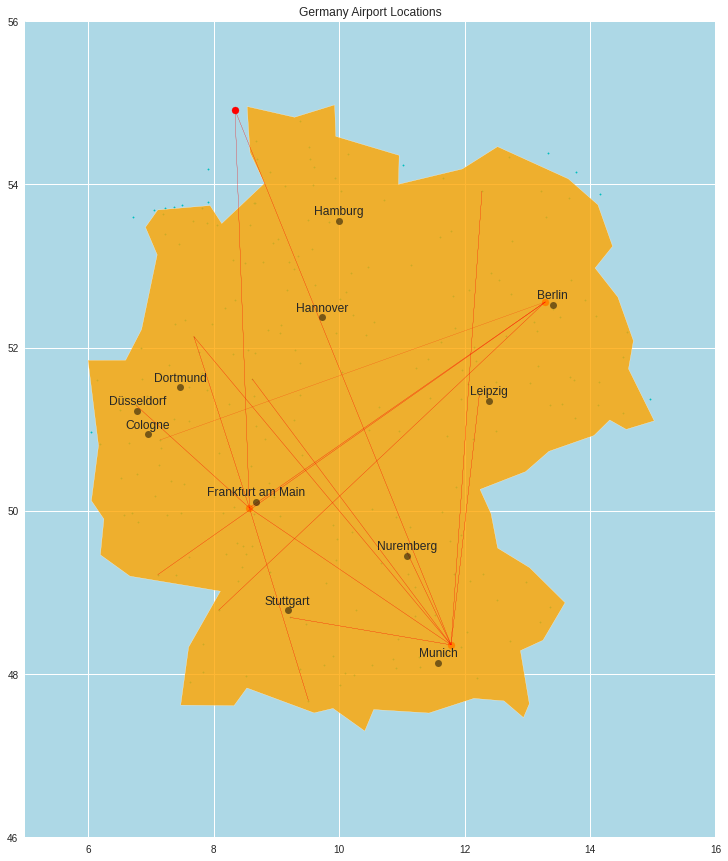

In [ ]:
plt.figure(figsize=(15, 11))
fig, ax = plt.subplots()
airports_ = airports_w_routes.sort_values("# Routes", ascending=False).head(4)
airport_idxs = airports_['Airport ID'].values
d = {}

plt.scatter(airports['Longitude'], airports['Latitude'], s=2, color='c')
plt.scatter(airports_['Longitude'], airports_['Latitude'], color='r')

for i, (sid, did, la_x, lo_x, la_y, lo_y) in routes_merged.iterrows():
    if (sid, did) in d:
        continue
        
    if int(sid) in airport_idxs or int(did) in airport_idxs:
        d[(sid, did)] = True
        plt.plot([lo_x, lo_y], [la_x, la_y], color='r', linewidth=0.15)
germany.plot(ax=ax,color='orange',alpha=0.8)

plt.ylim(46, 56)
plt.xlim(5, 16)
for c in top_cities.keys():
    # Plot city name.
    ax.text(
        x=top_cities[c][0], 
        # Add small shift to avoid overlap with point.
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )
    # Plot city location centroid.
    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany Airport Locations', 
    aspect=1.3, 
    facecolor='lightblue'
)
fig.set_figheight(15)
fig.set_figwidth(15)


The final number of airport that are coverd are 15.


In [ ]:
most_routes = np.array([mapping[airport] for airport in airport_idxs[:4]])
route_map[most_routes].max(axis=0).sum()

15.0

# Submodular Maximization Package


The same problem is now being solved using the Submodular Maximization Package to come up with near optimal solutions.

In [ ]:
from apricot import FacilityLocationSelection

model = FacilityLocationSelection(4,metric='precomputed')
model.fit(route_map)

airports_w_routes.iloc[model.ranking].head(4)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz,Type,Source,# Routes
342,346,Munich Airport,Munich,Germany,MUC,EDDM,48.353802,11.786100,1487,1,E,Europe/Berlin,airport,OurAirports,8.0
336,340,Frankfurt am Main Airport,Frankfurt,Germany,FRA,EDDF,50.033333,8.570556,364,1,E,Europe/Berlin,airport,OurAirports,6.0
347,351,Berlin-Tegel Airport,Berlin,Germany,TXL,EDDT,52.559700,13.287700,122,1,E,Europe/Berlin,airport,OurAirports,4.0
345,349,Saarbrücken Airport,Saarbruecken,Germany,SCN,EDDR,49.214600,7.109510,1058,1,E,Europe/Berlin,airport,OurAirports,2.0


Based of the solution from the Apricot package the selected airports are Munich Airport, Frankfurt am Main Airport , Berlin-Tegel Airport and Saarbrücken Airport. The solution from the Apricot Package is similar to the solution from the Heuristic technique.

# Visualization of the solution from Apricot Package

<Figure size 1080x792 with 0 Axes>

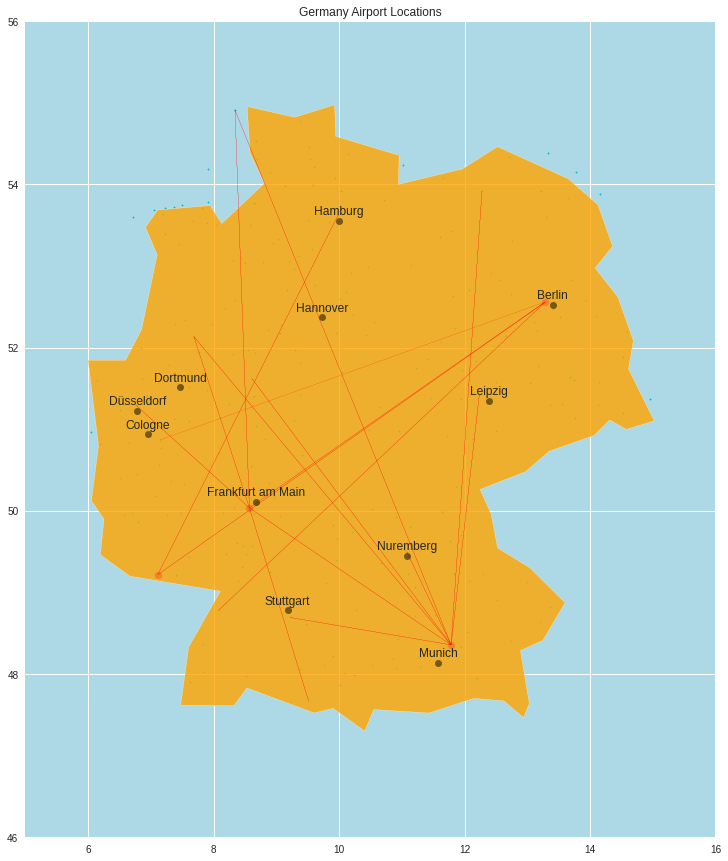

In [ ]:
airports_ = airports_w_routes.iloc[model.ranking]
airport_idxs = airports_['Airport ID'].values
d = {}

plt.figure(figsize=(15, 11))
fig, ax = plt.subplots()
plt.scatter(airports['Longitude'], airports['Latitude'], s=2, color='c')
plt.scatter(airports_['Longitude'], airports_['Latitude'], color='m')

for i, (sid, did, la_x, lo_x, la_y, lo_y) in routes_merged.iterrows():
    if (sid, did) in d:
        continue
    
    if int(sid) in airport_idxs or int(did) in airport_idxs:
        d[(sid, did)] = True
        plt.plot([lo_x, lo_y], [la_x, la_y], color='r', linewidth=0.15)

germany.plot(ax=ax,color='orange',alpha=0.8)

plt.ylim(46, 56)
plt.xlim(5, 16)
for c in top_cities.keys():
    # Plot city name.
    ax.text(
        x=top_cities[c][0], 
        # Add small shift to avoid overlap with point.
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )
    # Plot city location centroid.
    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany Airport Locations', 
    aspect=1.3, 
    facecolor='lightblue'
)
fig.set_figheight(15)
fig.set_figwidth(15)

The number of airports covered by using the apricot package is 16. The solution is greater than the solution of the Heuritic solution. 

In [ ]:
most_routes = np.array([mapping[airport] for airport in airport_idxs[:5]])
route_map[most_routes].max(axis=0).sum()

16.0

An observation from the solution is that the selection from Submodular Maximisation package, Apricot focuses on maximizing the information gain at each step, hence by choosing 'Saarbrücken Airport' as the final airport it covers an additional airport and increases the objective. 